# Análise Multivariada

### Importando bibliotecas necessárias

In [1]:
#Bibiliotecas de dados & visualização
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Bibliotecas Machine Learning
#Pré-processamento
from sklearn.preprocessing import StandardScaler
#Modelos de estatística/ml
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
#Divisao de modelo -> treino/teste
from sklearn.model_selection import train_test_split
#Métricas de erro/fit do modelo
from sklearn.metrics import mean_squared_error, r2_score
#Importando o LabelEncoder para transformar categorica em numerica
from sklearn.preprocessing import LabelEncoder

### Carregando e explorando o dataset escolhido

In [2]:
#Dataset Automobile (dados sobre veículos)
df = pd.read_csv("Automobile.csv")

In [3]:
#Renomeando colunas
df = df.rename(columns={"name":"Modelo",
                        "mpg":"Consumos Milhas/galão", 
                        "cylinders":"Cilindros", 
                        "displacement":"Cilindrada",
                        "horsepower":"Potência",
                        "weight":"Peso",
                        "acceleration":"Aceleração",
                        "model_year":"Ano Modelo", 
                        "origin":"Origem"})

In [4]:
#Head do dataframe
df.head()

,Modelo,Consumos Milhas/galão,Cilindros,Cilindrada,Potência,Peso,Aceleração,Ano Modelo,Origem
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


In [5]:
#Medidas estatísticas do dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Consumos Milhas/galão,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
Cilindros,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
Cilindrada,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
Potência,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
Peso,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
Aceleração,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
Ano Modelo,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


In [6]:
#Resumo do tipo de variaveis que temos no dataframe
df.dtypes

Modelo                    object
Consumos Milhas/galão    float64
Cilindros                  int64
Cilindrada               float64
Potência                 float64
Peso                       int64
Aceleração               float64
Ano Modelo                 int64
Origem                    object
dtype: object

In [7]:
#Contando quantos dados nulos temos por coluna
df.isna().sum()

Modelo                   0
Consumos Milhas/galão    0
Cilindros                0
Cilindrada               0
Potência                 6
Peso                     0
Aceleração               0
Ano Modelo               0
Origem                   0
dtype: int64

In [8]:
#Localizando os dados nulos
df.loc[df['Potência'].isna()]

,Modelo,Consumos Milhas/galão,Cilindros,Cilindrada,Potência,Peso,Aceleração,Ano Modelo,Origem
32,ford pinto,25.0,4,98.0,NaN,2046,19.0,71,usa
126,ford maverick,21.0,6,200.0,NaN,2875,17.0,74,usa
330,renault lecar deluxe,40.9,4,85.0,NaN,1835,17.3,80,europe
336,ford mustang cobra,23.6,4,140.0,NaN,2905,14.3,80,usa
354,renault 18i,34.5,4,100.0,NaN,2320,15.8,81,europe
374,amc concord dl,23.0,4,151.0,NaN,3035,20.5,82,usa


In [9]:
#Dropando dados nulos
df.dropna(inplace=True)

### Correlação entre variáveis

<Axes: xlabel='Cilindrada', ylabel='Potência'>

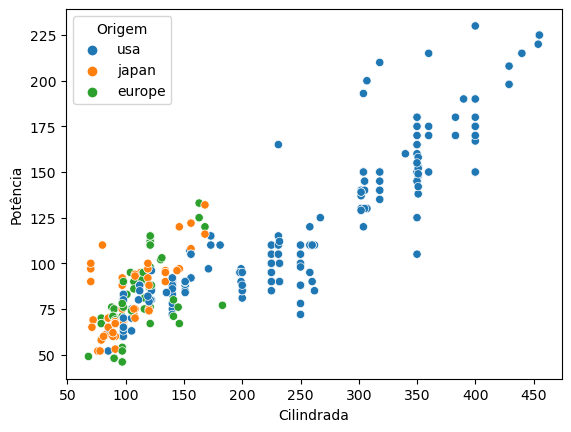

In [10]:
#Correlação entre Cilindrada e Potência por Origem
sns.scatterplot(data=df, x='Cilindrada', y='Potência', hue=df['Origem'])

<Axes: xlabel='Potência', ylabel='Consumos Milhas/galão'>

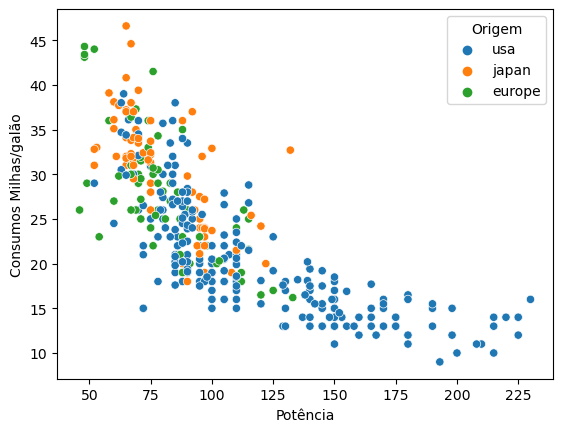

In [11]:
#Correlação entre Potência e Consumo por Origem. Cavalo que anda, bebe?
sns.scatterplot(data=df, x='Potência', y='Consumos Milhas/galão', hue=df['Origem'])

<Axes: xlabel='Aceleração', ylabel='Potência'>

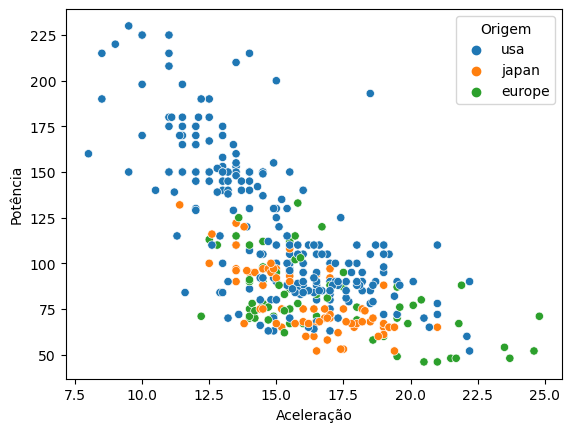

In [12]:
#Qual a correlação entre Aceleração e Potência por Origem?
sns.scatterplot(data=df, x=df['Aceleração'], y=df['Potência'], hue=df['Origem'])

### E se utilizarmos a regressão múltipla para prever a potência de um carro baseado na sua aceleração e peso?

In [13]:
#Definindo features e target
X = df[['Aceleração','Peso']]
y = df['Potência']

In [14]:
#Chamando a função de Regressão Linear
reg = LinearRegression()

In [15]:
#Treinando o modelo
reg.fit(X,y)

LinearRegression()

In [16]:
print("A equação é: potência = {} * Aceleração + {} * Peso + {}".format(reg.coef_[0], reg.coef_[1],reg.intercept_))

A equação é: potência = -5.552429471582978 * Aceleração + 0.03165960712482472 * Peso + 96.49236177497394


In [17]:
#Previsão com o modelo

In [18]:
#Predict 
df['Potência Prevista'] = reg.predict(X)

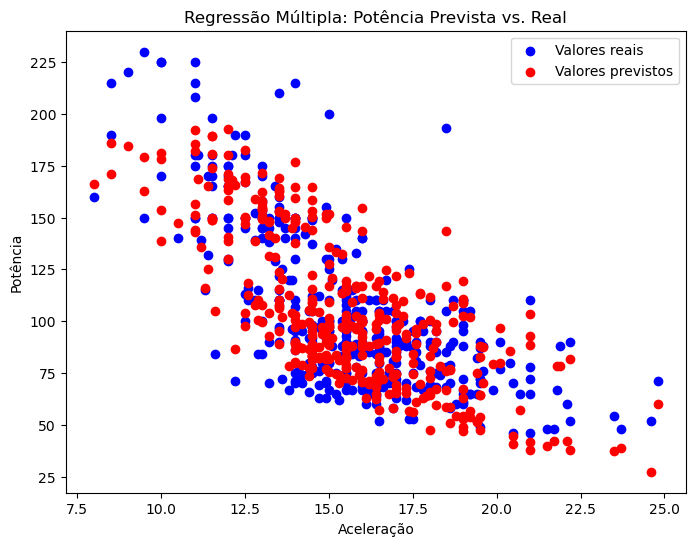

In [19]:
#Plotando os valores reais x valores previstos
plt.figure(figsize=(8, 6))
plt.scatter(df['Aceleração'], df['Potência'], color='blue', label='Valores reais')
plt.scatter(df['Aceleração'], df['Potência Prevista'], color='red', label='Valores previstos')
plt.title('Regressão Múltipla: Potência Prevista vs. Real')
plt.xlabel('Aceleração')
plt.ylabel('Potência')
plt.legend()
plt.show()

In [20]:
# Selecionando variáveis independentes (features) e variável dependente (target)
X = df.drop(columns=['Potência','Origem','Modelo','Ano Modelo','Potência Prevista'])  # Usamos todas as outras características númericas para prever a potência
y = df['Potência']  # Variável dependente

# Dividindo os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo de regressão linear múltipla
model = LinearRegression()

# Treinando o modelo com os dados de treino
model.fit(X_train, y_train)

# Fazendo previsões nos dados de teste
y_pred = model.predict(X_test)

# Avaliando o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Coeficientes: {model.coef_}")
print(f"Intercepto: {model.intercept_}")
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f}")

# Exibindo os coeficientes de maneira mais interpretável
coef_df = pd.DataFrame(model.coef_, X.columns, columns=['Coeficiente'])
print("\nCoeficientes da Regressão Linear Múltipla:")
coef_df

Coeficientes: [-0.4420008  -1.60231742  0.12354182  0.01795927 -4.7680692 ]
Intercepto: 120.14186750620323
Erro Quadrático Médio (MSE): 168.48
Coeficiente de Determinação (R²): 0.89

Coeficientes da Regressão Linear Múltipla:


,Coeficiente
Consumos Milhas/galão,-0.442001
Cilindros,-1.602317
Cilindrada,0.123542
Peso,0.017959
Aceleração,-4.768069


In [21]:
#Carregando uma nova base para resetar as alterações que fizemos nas colunas
df = pd.read_csv("Automobile.csv")
df = df.rename(columns={"name":"Modelo",
                        "mpg":"Consumos Milhas/galão", 
                        "cylinders":"Cilindros", 
                        "displacement":"Cilindrada",
                        "horsepower":"Potência",
                        "weight":"Peso",
                        "acceleration":"Aceleração",
                        "model_year":"Ano Modelo", 
                        "origin":"Origem"})
df.dropna(inplace=True)

In [22]:
df.head()

,Modelo,Consumos Milhas/galão,Cilindros,Cilindrada,Potência,Peso,Aceleração,Ano Modelo,Origem
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


In [23]:
label_encoder = LabelEncoder()

In [24]:
#Transformando categorica em númerica
df['Origem Encoder'] = label_encoder.fit_transform(df['Origem'])

In [25]:
#Dropando variáveis categoricas
df = df.drop(columns=['Modelo', 'Origem'])

In [26]:
# Normalizando os dados (padronização)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Aplicando o PCA para reduzir para 2 componentes principais
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Criando um DataFrame com os componentes principais
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['target'] = df['Origem Encoder']

df_pca.head()

,PC1,PC2,PC3,target
0,2.715998,0.854762,-0.161754,2.0
1,3.544445,0.928372,-0.361876,2.0
2,3.037252,0.954989,-0.589046,2.0
3,2.979985,0.943976,-0.214145,2.0
4,2.972184,1.011343,-0.645092,2.0


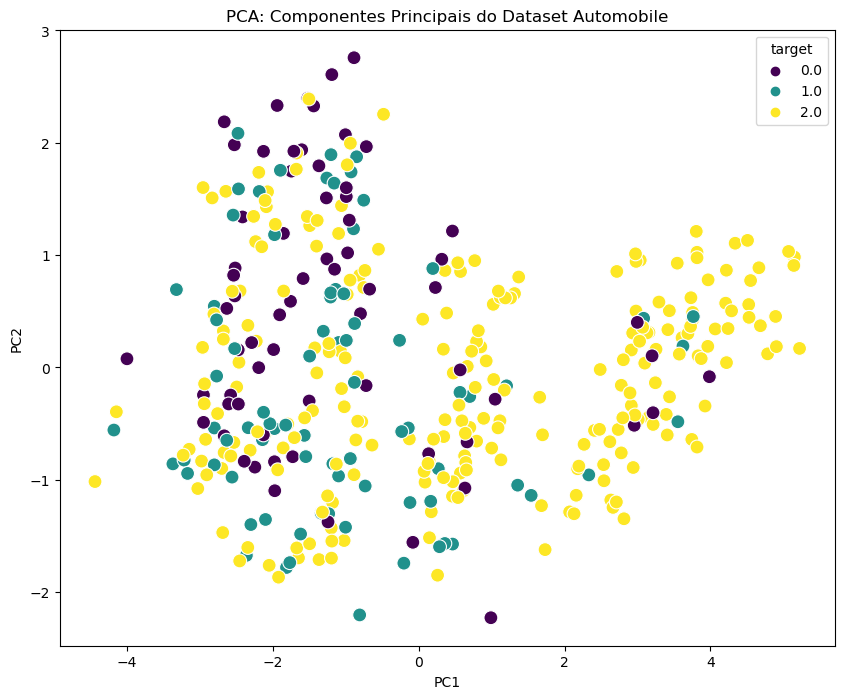

In [27]:
#Plotando o PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='target', palette='viridis', s=100)
plt.title('PCA: Componentes Principais do Dataset Automobile')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [28]:
# Explicação da variância explicada por cada componente principal
print(f'Variância explicada por PC1: {pca.explained_variance_ratio_[0]:.2f}')
print(f'Variância explicada por PC2: {pca.explained_variance_ratio_[1]:.2f}')

Variância explicada por PC1: 0.67
Variância explicada por PC2: 0.13


In [29]:
#Carregando uma nova base para resetar as alterações que fizemos nas colunas
df = pd.read_csv("Automobile.csv")
df = df.rename(columns={"name":"Modelo",
                        "mpg":"Consumos Milhas/galão", 
                        "cylinders":"Cilindros", 
                        "displacement":"Cilindrada",
                        "horsepower":"Potência",
                        "weight":"Peso",
                        "acceleration":"Aceleração",
                        "model_year":"Ano Modelo", 
                        "origin":"Origem"})
df.dropna(inplace=True)
df['Origem Encoder'] = label_encoder.fit_transform(df['Origem'])
df = df.drop(columns=['Modelo', 'Origem'])

In [30]:
# Normalizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Aplicando o K-Means Clustering com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
df['cluster'] = kmeans.fit_predict(X_scaled)

# Reduzindo para 2 componentes principais para visualização usando PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PC1'] = X_pca[:, 0]
df['PC2'] = X_pca[:, 1]

C:\Users\joaov\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


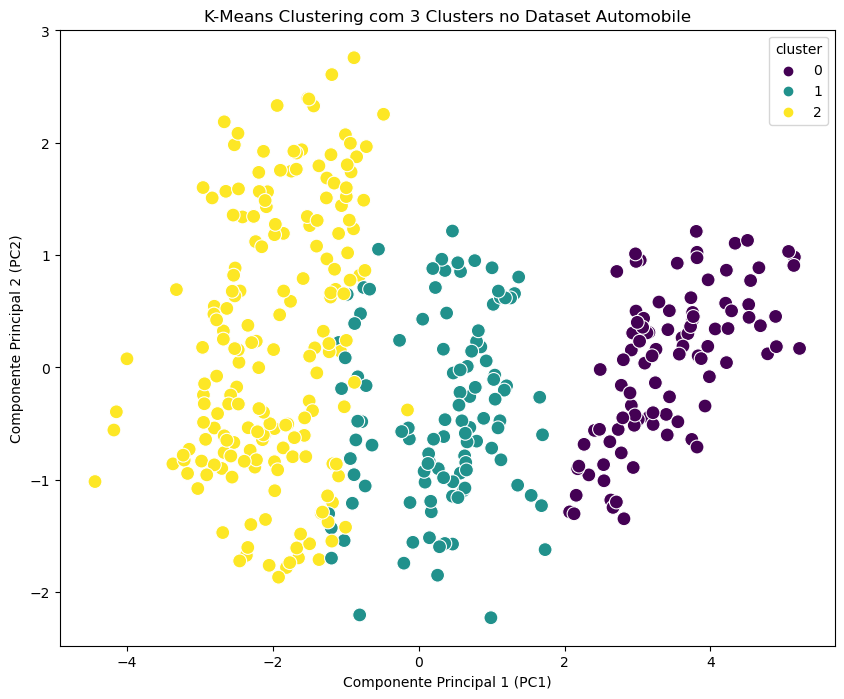

In [31]:
#Plotando o K-Means
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='cluster', palette='viridis', s=100)
plt.title('K-Means Clustering com 3 Clusters no Dataset Automobile')
plt.xlabel('Componente Principal 1 (PC1)')
plt.ylabel('Componente Principal 2 (PC2)')
plt.show()

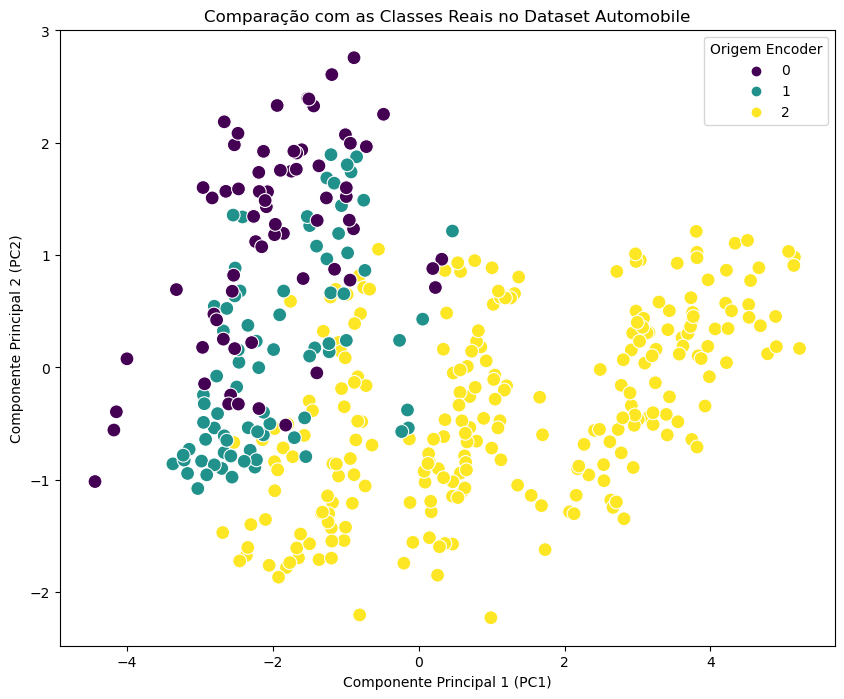

In [32]:
# Comparação com as classes reais
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='PC1', y='PC2', hue=df['Origem Encoder'], palette='viridis', s=100)
plt.title('Comparação com as Classes Reais no Dataset Automobile')
plt.xlabel('Componente Principal 1 (PC1)')
plt.ylabel('Componente Principal 2 (PC2)')
plt.show()